In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [74]:
csv_file_path = 'outbreaks.csv'
outbreaks_df = pd.read_csv(csv_file_path)
outbreaks_df.head()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0


In [75]:
outbreaks_df.count()

Year                 19119
Month                19119
State                19119
Location             16953
Food                 10156
Ingredient            1876
Species              12500
Serotype/Genotype     3907
Status               12500
Illnesses            19119
Hospitalizations     15494
Fatalities           15518
dtype: int64

In [76]:
virus = outbreaks_df['Species']
virus

0                           NaN
1                           NaN
2                           NaN
3               Scombroid toxin
4           Salmonella enterica
                  ...          
19114    Norovirus genogroup II
19115    Norovirus genogroup II
19116    Norovirus genogroup II
19117    Norovirus genogroup II
19118                       NaN
Name: Species, Length: 19119, dtype: object

In [77]:
virus = outbreaks_df['Species']
virus_clean_df = virus.dropna()
virus_clean_df

3                Scombroid toxin
4            Salmonella enterica
5                Shigella boydii
7            Salmonella enterica
8                          Virus
                  ...           
19113    Clostridium perfringens
19114     Norovirus genogroup II
19115     Norovirus genogroup II
19116     Norovirus genogroup II
19117     Norovirus genogroup II
Name: Species, Length: 12500, dtype: object

In [85]:
virus_clean_df.value_counts()

Norovirus genogroup I                                            2744
Salmonella enterica                                              2303
Norovirus genogroup II                                           1424
Norovirus unknown                                                 790
Clostridium perfringens                                           732
                                                                 ... 
Campylobacter jejuni; Escherichia coli, Shiga toxin-producing       1
Bacillus unknown                                                    1
Trichinella                                                         1
Norovirus unknown; Staphylococcus unknown                           1
Clostridium perfringens; Campylobacter jejuni                       1
Name: Species, Length: 201, dtype: int64

In [96]:
top_virus_df = virus_clean_df.value_counts() >= 500
top_virus_df

Norovirus genogroup I                                             True
Salmonella enterica                                               True
Norovirus genogroup II                                            True
Norovirus unknown                                                 True
Clostridium perfringens                                           True
                                                                 ...  
Campylobacter jejuni; Escherichia coli, Shiga toxin-producing    False
Bacillus unknown                                                 False
Trichinella                                                      False
Norovirus unknown; Staphylococcus unknown                        False
Clostridium perfringens; Campylobacter jejuni                    False
Name: Species, Length: 201, dtype: bool

In [97]:
top_virus_df.head()

Norovirus genogroup I      True
Salmonella enterica        True
Norovirus genogroup II     True
Norovirus unknown          True
Clostridium perfringens    True
Name: Species, dtype: bool

In [98]:
top_virus_df.count()

201

In [102]:
top_virus_df.value_counts()

False    195
True       6
Name: Species, dtype: int64

In [80]:
food = outbreaks_df['Food']
food_df = food.dropna()
food_df

1                                        Custard
3                                      Fish, Ahi
4              Lasagna, Unspecified; Eggs, Other
7        Stuffing, Unspecified; Sandwich, Turkey
8                             Salad, Unspecified
                          ...                   
19105                    Meal Replacement Powder
19108                                  Foie Gras
19111                    Cookies, Chocolate Chip
19113                                Gravy, Pork
19115                                      Salsa
Name: Food, Length: 10156, dtype: object

In [81]:
food_df.value_counts()

Multiple Foods                                                          206
Oysters, Raw                                                            165
Ground Beef, Hamburger                                                  127
Salad, Unspecified                                                      118
Chicken, Unspecified                                                    105
                                                                       ... 
Chicken Salad; Tuna, Unspecified                                          1
Sandwich, Deli; Pasta, Unspecified                                        1
Shrimp Coconut; Shrimp Dijon; Green Beans; Mushrooms,Spinach Stuffed      1
Oysters, Unspecified; Vegetable-Based Salads Unspecified                  1
Water; Ravioli, Unspecified; Ground Beef, Meatballs                       1
Name: Food, Length: 3127, dtype: int64

In [82]:
food_df.value_counts()
food_df.drop[Multiple Foods]

SyntaxError: invalid syntax (<ipython-input-82-65b8cc446c08>, line 2)

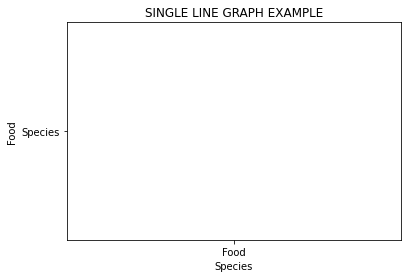

In [ ]:
x = ['Food']

y = ['Species']

plt.plot(x, y)


plt.xlabel("Species")


plt.ylabel("Food")


plt.title("")


plt.show()